In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
np.random.seed(333)
import joblib
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.layers import (
    Conv1D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling1D
)

from tensorflow.keras.metrics import RootMeanSquaredError 
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

In [3]:
import pandas as pd
df_train = pd.read_csv(r"drive/My Drive/classification_model/df_training.csv")
df_test = pd.read_csv(r"drive/My Drive/classification_model/df_testing.csv")
df_validation = pd.read_csv(r"drive/My Drive/classification_model/df_validation.csv")

In [4]:
#pd.set_option('display.max_rows', 1000)
df_train.isna().sum()

Unnamed: 0        0
filename          0
time              0
video_b           0
video_g           0
                 ..
tonnetz_mean      0
tonnetz_std       0
tonnetz_median    0
tonnetz_len       0
label             0
Length: 129, dtype: int64

In [5]:
df_validation.rename({'mfcc_sum_y': 'mfcc_sum'}, axis=1, inplace=True)  # new method
df_validation.drop(["mfcc_sum_x"] , axis=1, inplace=True )     
df_test.rename({'mfcc_sum_y': 'mfcc_sum'}, axis=1, inplace=True)  # new method
df_test.drop(["mfcc_sum_x"] , axis=1, inplace=True )             
#df.rename({'a': 'X', 'b': 'Y'}, axis=1, inplace=True)  # new method

In [6]:
#df_validation
df_train = df_train.iloc[: , 1:]
df_test = df_test.iloc[: , 1:]
df_validation = df_validation.iloc[: , 1:]

In [7]:
df_train = df_train.iloc[: , 1:]
df_test = df_test.iloc[: , 1:]
df_validation = df_validation.iloc[: , 1:]

In [8]:
df_train.drop(["chroma_stft","spectral_contrast"	,"zero",	"chroma_cqt",	"chroma_cens",	"melspectrogram",	"mfcc",	"rms"	,"spectral_centroid",	"spectral_bandwidth",		"spectral_flatness",	"spectral_rolloff",	"poly_features",	"tonnetz"], axis=1, inplace=True)
df_test.drop(["chroma_stft","spectral_contrast"	,"zero",	"chroma_cqt",	"chroma_cens",	"melspectrogram",	"mfcc",	"rms"	,"spectral_centroid",	"spectral_bandwidth",		"spectral_flatness",	"spectral_rolloff",	"poly_features",	"tonnetz"], axis=1, inplace=True)
df_validation.drop(["chroma_stft","spectral_contrast"	,"zero",	"chroma_cqt",	"chroma_cens",	"melspectrogram",	"mfcc",	"rms"	,"spectral_centroid",	"spectral_bandwidth",		"spectral_flatness",	"spectral_rolloff",	"poly_features",	"tonnetz"], axis=1, inplace=True)



In [9]:
df_train["label"].replace({"animated": 1, "non-animated": 0}, inplace=True)
df_test["label"].replace({"animated": 1, "non-animated": 0}, inplace=True)
df_validation["label"].replace({"animated": 1, "non-animated": 0}, inplace=True)


In [10]:
df_train.reset_index(inplace=True,drop=True)
df_test.reset_index(inplace=True,drop=True)
df_validation.reset_index(inplace=True,drop=True)

In [11]:
df_train.drop(["chroma_cqt_max", "chroma_stft_max","mfcc_sum" ], axis=1, inplace=True)  
df_test.drop(["chroma_cqt_max", "chroma_stft_max","mfcc_sum" ], axis=1, inplace=True)  
df_validation.drop(["chroma_cqt_max", "chroma_stft_max","mfcc_sum" ], axis=1, inplace=True)  

df_train.reset_index(inplace=True,drop=True)
df_test.reset_index(inplace=True,drop=True)
df_validation.reset_index(inplace=True,drop=True)

In [12]:
df_train.shape

(999, 110)

In [13]:
labels=df_train['label']
features = df_train.iloc[:,0:109]
X_train=features
y_train=np.ravel(labels)
X_test = df_test.iloc[:,0:109]
X_validation = df_validation.iloc[:,0:109]
y_test=np.ravel(df_test['label'])
y_val=np.ravel(df_validation['label'])


In [14]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)  
X_validation = scaler.transform(X_validation)

In [16]:
model_1 = Sequential([
    Dense(109, activation='relu',input_shape=[(X_train.shape)[1]],kernel_regularizer=keras.regularizers.l2(l=0.001)),
    #Dense(64,activation='relu',kernel_regularizer=keras.regularizers.l2(l=0.001)),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')

  ])

In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 109)               11990     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               14080     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 2

In [18]:
model_1.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [20]:
es_callback = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 6,restore_best_weights = True,mode='min')
                          
                          
                          
                          

Epoch 1/500
2/2 [==============================] - 1s 329ms/step - loss: 0.8091 - accuracy: 0.4705 - val_loss: 0.8111 - val_accuracy: 0.4596
Epoch 2/500
2/2 [==============================] - 0s 24ms/step - loss: 0.8073 - accuracy: 0.4715 - val_loss: 0.8091 - val_accuracy: 0.4697
Epoch 3/500
2/2 [==============================] - 0s 23ms/step - loss: 0.8056 - accuracy: 0.4775 - val_loss: 0.8071 - val_accuracy: 0.4697
Epoch 4/500
2/2 [==============================] - 0s 22ms/step - loss: 0.8039 - accuracy: 0.4825 - val_loss: 0.8052 - val_accuracy: 0.4747
Epoch 5/500
2/2 [==============================] - 0s 25ms/step - loss: 0.8024 - accuracy: 0.4915 - val_loss: 0.8033 - val_accuracy: 0.4848
Epoch 6/500
2/2 [==============================] - 0s 23ms/step - loss: 0.8008 - accuracy: 0.5025 - val_loss: 0.8015 - val_accuracy: 0.4899
Epoch 7/500
2/2 [==============================] - 0s 24ms/step - loss: 0.7993 - accuracy: 0.5055 - val_loss: 0.7997 - val_accuracy: 0.4949
Epoch 8/500
2/2 [==

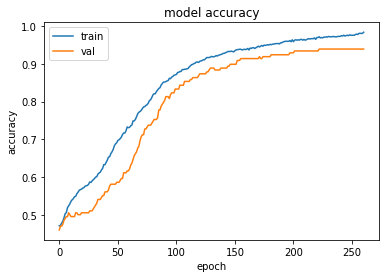

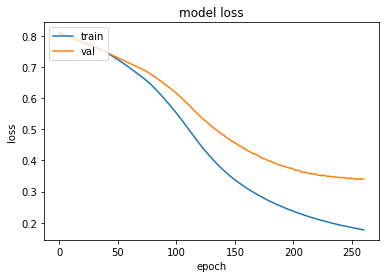

In [21]:
import matplotlib.pyplot as plt

history=model_1.fit(X_train,y_train,validation_data=(X_validation,y_val), epochs=500, batch_size=500, verbose=1,callbacks=[es_callback])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
y_pred_test = model_1.predict(X_test)
from sklearn.metrics import accuracy_score
#print(accuracy_score(y_test, y_pred_test)) #rmse value for training

In [23]:
#ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [24]:
type(y_pred_test)

numpy.ndarray

In [25]:
y_pred_testt = np.where(y_pred_test > 0.5, 1, 0)

In [26]:
len(y_pred_testt)

197

In [27]:
np.unique(y_pred_testt)

array([0, 1])

In [28]:
print(accuracy_score(y_test, y_pred_testt)) #rmse value for training

0.9644670050761421
